In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

### Octave code to simulate linear Kalman filter for simple example
This code simulates the example introduced in lesson 3.3.3 and is a straightforward implementation of the six Kalman-filter steps on a simple model. You will use this code to answer the practice-quiz questions for this lesson. Feel free to add your own statements to plot or output variables computed by the filter to help you understand better how it works.

In [5]:
sigma_w = 1 # process noise covariance
sigma_v = 1 # process noise covariance
A = 1
B = 1 
C = 1
D = 0  # plant definition matrices
max_iter = 40

sigma_w = np.array(sigma_w)
sigma_v = np.array(sigma_v)
A = np.array(A)
B = np.array(B)
C = np.array(C)
D = np.array(D)

# Initialize true state, state estimate, error covariance, initial input

xtrue = np.array((0))  # Initialize true system initial state
xhat = 0   # Initialize Kalman filter initial estimate
sigma_x = 0 # Initialize Kalman filter covariance
u = 0      # Unknown initial driving input: assume zero

xstore = np.zeros((max_iter+1,1))
xstore[:,0] = 0

xhatstore = np.zeros((max_iter,1))
sigma_xstore = np.zeros((max_iter,1**2))

# temp vars
L_store = np.zeros((max_iter,1))
u_store = np.zeros((max_iter,1))

for k in range(max_iter):
    
    # KF Step 1: State estimate time update
    xhat = A*xhat + B*u # use prior value of u
    
    # KF Step 2: Error covariance time update
    sigma_x = A*sigma_x*A.T + sigma_w 
    
    # Implied operation of system in background, with input signal u, output signal z
    u = 0.5*np.random.randn(1) + np.cos(k/np.pi)
    w = cholesky(sigma_w).T*np.random.randn(1)
    v = cholesky(sigma_v).T*np.random.randn(1*C)
    ztrue = C*xtrue + D*u + v
    xtrue = A*xtrue + B*u + w
    
    # KF Step 3: Estimate system output
    zhat = C*xhat + D*u
    
    # KF Step 4: Compute Kalman gain matrix
    L = sigma_x*C.T/(C*sigma_x*C.T + sigma_v)
    print(sigma_x,sigma_v,C,L)
    
    # KF Step 5: State estimate measurement update
    xhat = xhat + L*(ztrue - zhat)
    
    # KF Step 6: Error covariance measurement update
    sigma_x = sigma_x - L*C*sigma_x
    
    # [Store information for evaluation/plotting purposes]
    xstore[k+1,:] = xtrue
    xhatstore[k,:] = xhat
    sigma_xstore[k,:] = sigma_x
    
    L_store[k,:] = L
    u_store[k,:] = u

1 1 1 0.5
1.5 1 1 0.6
1.6 1 1 0.6153846153846154
1.6153846153846154 1 1 0.6176470588235294
1.6176470588235294 1 1 0.6179775280898876
1.6179775280898876 1 1 0.6180257510729613
1.6180257510729614 1 1 0.6180327868852459
1.618032786885246 1 1 0.6180338134001252
1.6180338134001253 1 1 0.6180339631667064
1.6180339631667067 1 1 0.618033985017358
1.618033985017358 1 1 0.6180339882053251
1.6180339882053252 1 1 0.6180339886704432
1.6180339886704431 1 1 0.6180339887383031
1.6180339887383028 1 1 0.6180339887482036
1.6180339887482036 1 1 0.618033988749648
1.6180339887496484 1 1 0.6180339887498589
1.618033988749859 1 1 0.6180339887498896
1.6180339887498896 1 1 0.6180339887498941
1.618033988749894 1 1 0.6180339887498947
1.618033988749895 1 1 0.6180339887498949
1.6180339887498947 1 1 0.6180339887498948
1.618033988749895 1 1 0.6180339887498949
1.6180339887498947 1 1 0.6180339887498948
1.618033988749895 1 1 0.6180339887498949
1.6180339887498947 1 1 0.6180339887498948
1.618033988749895 1 1 0.618033988749

Text(0.5, 1.0, 'Kalman filter in action')

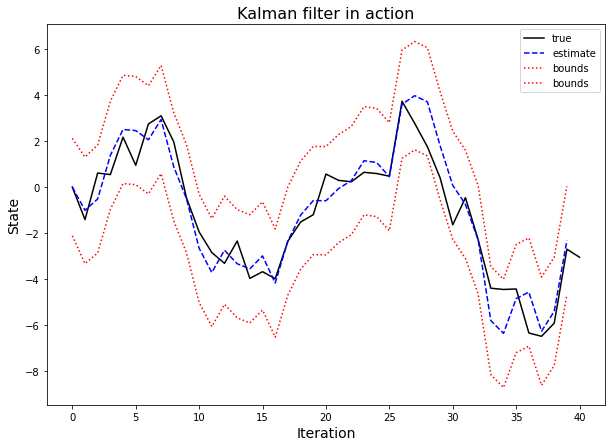

In [3]:
plt.figure(figsize=(10,7))
plt.plot(xstore,label='true',color='black')
plt.plot(xhatstore,label='estimate',color='blue',ls='dashed')
plt.plot(xhatstore+3*np.sqrt(sigma_xstore),color='red',ls='dotted',label='bounds')
plt.plot(xhatstore-3*np.sqrt(sigma_xstore),color='red',ls='dotted',label='bounds')
plt.legend()
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('State',fontsize=14)
plt.title('Kalman filter in action',fontsize=16)

Text(0.5, 1.0, 'Error with bounds')

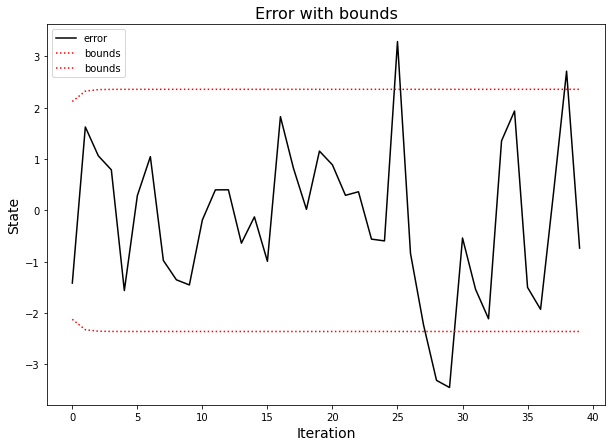

In [4]:
est_error = xstore[1:] - xhatstore

plt.figure(figsize=(10,7))
plt.plot(est_error,label='error',color='black')
plt.plot(3*np.sqrt(sigma_xstore),color='red',ls='dotted',label='bounds')
plt.plot(-3*np.sqrt(sigma_xstore),color='red',ls='dotted',label='bounds')
plt.legend()
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('State',fontsize=14)
plt.title('Error with bounds',fontsize=16)